Import the Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import the data file from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading dataset

In [ ]:
file_path = '/content/drive/MyDrive/Financial_Analytics_data.csv'
df = pd.read_csv(file_path)

Data Overview

In [ ]:
data = pd.read_csv(file_path)

print("Data Overview:")
print(data.head())  # Display the first 5 rows
print(data.info())  # Display column info and data types
print(data.describe())  # Statistical summary of numerical columns


Data Overview:
   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      1  Reliance Inds.        583436.72           99810.00         NaN
1      2             TCS        563709.84           30904.00         NaN
2      3       HDFC Bank        482953.59           20581.27         NaN
3      4             ITC        320985.27            9772.02         NaN
4      5         H D F C        289497.37           16840.51         NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB
None
            S.No.  Mar Cap - Crore  Sal

Data Cleaning

In [ ]:
# Remove columns with 'Unnamed' in their names, if they exist
data = data.drop(columns=[col for col in data.columns if col.startswith('Unnamed')], errors='ignore')


In [ ]:
# Handle missing values: Dropping rows where key columns have missing values
data_cleaned = data.dropna(subset=['Mar Cap - Crore', 'Sales Qtr - Crore'])


In [ ]:
# Check for duplicate rows and remove them
data_cleaned = data_cleaned.drop_duplicates()

In [ ]:
# Display the cleaned data's structure
print("Cleaned Data Information:")
print(data_cleaned.info())


Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 486
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              365 non-null    int64  
 1   Name               365 non-null    object 
 2   Mar Cap - Crore    365 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.3+ KB
None


Exploratory Data Analysis (EDA)

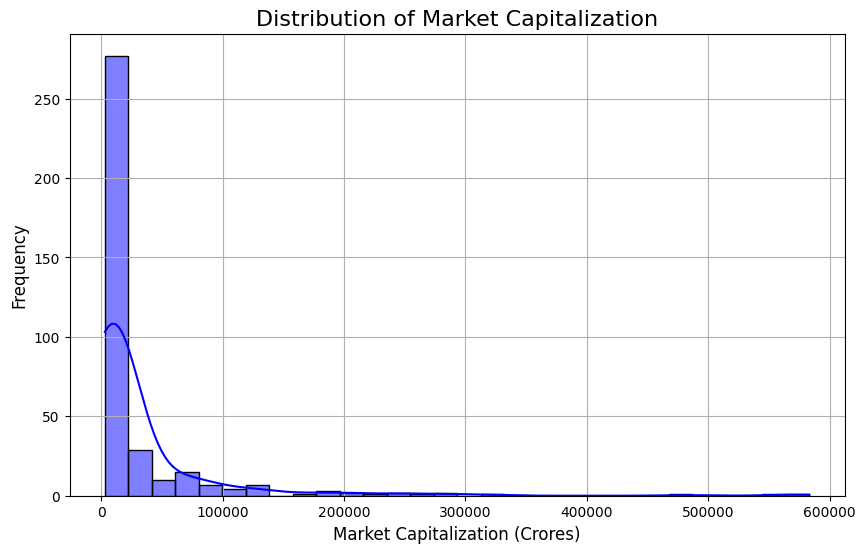

In [ ]:
# Visualize data distributions and relationships

# 6.1 Distribution of Market Capitalization
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Mar Cap - Crore'], bins=30, kde=True, color='blue')
plt.title('Distribution of Market Capitalization', fontsize=16)
plt.xlabel('Market Capitalization (Crores)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

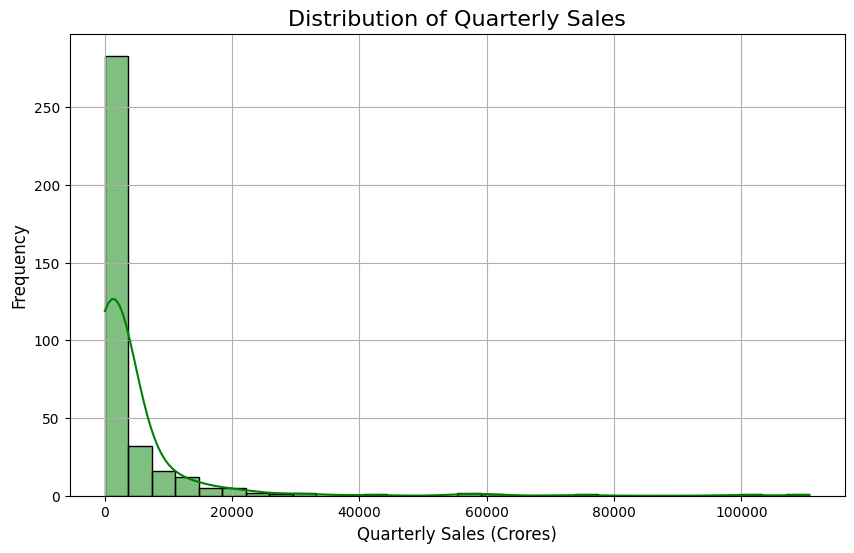

In [ ]:

# 6.2 Distribution of Quarterly Sales
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Sales Qtr - Crore'], bins=30, kde=True, color='green')
plt.title('Distribution of Quarterly Sales', fontsize=16)
plt.xlabel('Quarterly Sales (Crores)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


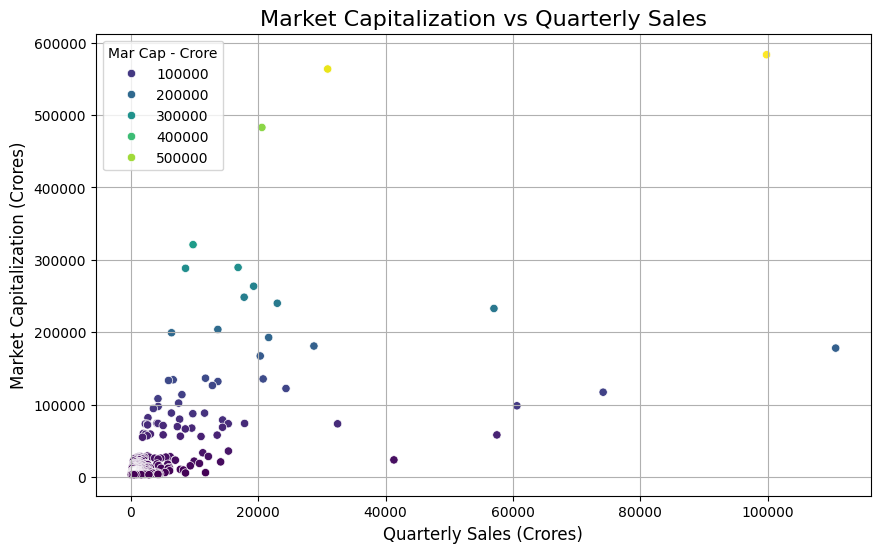

In [ ]:

# 6.3 Scatter Plot: Market Capitalization vs. Quarterly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=data_cleaned, hue='Mar Cap - Crore', palette='viridis')
plt.title('Market Capitalization vs Quarterly Sales', fontsize=16)
plt.xlabel('Quarterly Sales (Crores)', fontsize=12)
plt.ylabel('Market Capitalization (Crores)', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:

# Step 7: Statistical Analysis
# Calculate and display correlation between numerical variables
correlation_matrix = data_cleaned[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   Mar Cap - Crore  Sales Qtr - Crore
Mar Cap - Crore           1.000000           0.620702
Sales Qtr - Crore         0.620702           1.000000


In [ ]:
# Key metrics: mean, median, and standard deviation
metrics = {
    'Mean Market Capitalization': data_cleaned['Mar Cap - Crore'].mean(),
    'Median Market Capitalization': data_cleaned['Mar Cap - Crore'].median(),
    'Std Dev Market Capitalization': data_cleaned['Mar Cap - Crore'].std(),
    'Mean Quarterly Sales': data_cleaned['Sales Qtr - Crore'].mean(),
    'Median Quarterly Sales': data_cleaned['Sales Qtr - Crore'].median(),
    'Std Dev Quarterly Sales': data_cleaned['Sales Qtr - Crore'].std()
}



In [ ]:
# Print metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")


Mean Market Capitalization: 31300.97
Median Market Capitalization: 9097.33
Std Dev Market Capitalization: 67224.64
Mean Quarterly Sales: 4395.98
Median Quarterly Sales: 1278.30
Std Dev Quarterly Sales: 11092.21


In [ ]:

# Step 8: Top Companies Analysis
# Find the top 10 companies by Market Capitalization
top_companies = data_cleaned.sort_values(by='Mar Cap - Crore', ascending=False).head(10)
print("Top 10 Companies by Market Capitalization:")
print(top_companies[['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore']])


Top 10 Companies by Market Capitalization:
             Name  Mar Cap - Crore  Sales Qtr - Crore
0  Reliance Inds.        583436.72           99810.00
1             TCS        563709.84           30904.00
2       HDFC Bank        482953.59           20581.27
3             ITC        320985.27            9772.02
4         H D F C        289497.37           16840.51
5  Hind. Unilever        288265.26            8590.00
6   Maruti Suzuki        263493.81           19283.20
7         Infosys        248320.35           17794.00
8         O N G C        239981.50           22995.88
9  St Bk of India        232763.33           57014.08


<ipython-input-51-56fec83aa51c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mar Cap - Crore', y='Name', data=top_companies, palette='mako')


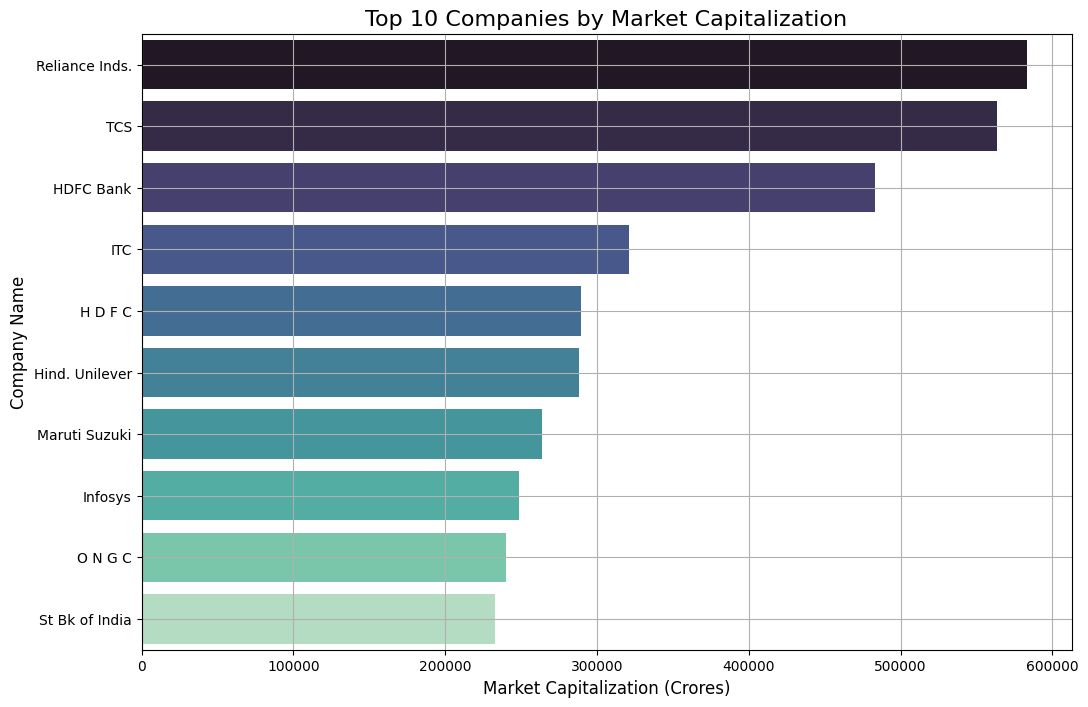

In [ ]:

# Step 9: Additional Visualization (Optional)
# Bar plot for the top 10 companies
plt.figure(figsize=(12, 8))
sns.barplot(x='Mar Cap - Crore', y='Name', data=top_companies, palette='mako')
plt.title('Top 10 Companies by Market Capitalization', fontsize=16)
plt.xlabel('Market Capitalization (Crores)', fontsize=12)
plt.ylabel('Company Name', fontsize=12)
plt.grid(True)
plt.show()


